<h1 align="center">CENSO EDUCAÇÃO SUPERIOR 2016 </h1>

**Objetivo**: explorar [base de dados](http://inep.gov.br/microdados) do censo da educação superior de 2016.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
#para selecionar linhas aleatórias do dataframe
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from scipy import stats
from statsmodels.stats import diagnostic

In [3]:
plt.style.use('seaborn-colorblind')

## Diferença na escolaridade dos docentes

In [4]:
docentes = pd.read_csv('DM_DOCENTE.CSV',encoding= 'latin-1', sep='|')
docentes.shape

(397611, 50)

In [5]:
docentes.head(3)

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,IN_CAPITAL_IES,CO_DOCENTE_IES,CO_DOCENTE,CO_SITUACAO_DOCENTE,...,IN_ATU_GRAD_PRESENCIAL,IN_ATU_POS_EAD,IN_ATU_POS_PRESENCIAL,IN_ATU_SEQUENCIAL,IN_ATU_PESQUISA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,IN_EXERCICIO_DT_REF,IN_VISITANTE,IN_VISITANTE_IFES_VINCULO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559840,669,1,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559841,670,1,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559839,719,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN


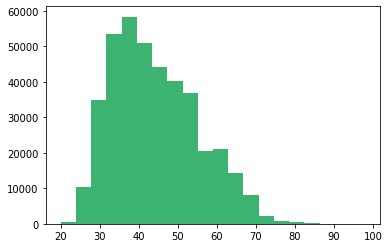

In [12]:
plt.hist(docentes['NU_IDADE_DOCENTE'], bins=20, color='#3CB371');

A maior parte dos docentes tem entre 30 e 40 anos. E existem docentes com mais de 80 anos (!)

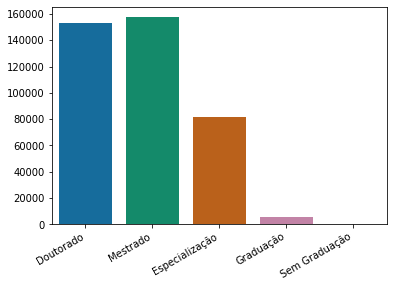

In [15]:
sns.countplot(docentes['DS_ESCOLARIDADE_DOCENTE'])
plt.xticks(rotation=30, ha='right')
plt.xlabel("")
plt.ylabel("");

In [13]:
docentes['DS_ESCOLARIDADE_DOCENTE'].value_counts()

Mestrado          157405
Doutorado         153021
Especialização     81290
Graduação           5875
Sem Graduação         20
Name: DS_ESCOLARIDADE_DOCENTE, dtype: int64

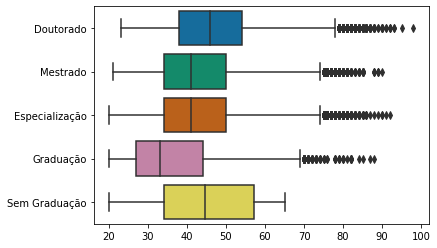

In [16]:
sns.boxplot(docentes.NU_IDADE_DOCENTE, docentes.DS_ESCOLARIDADE_DOCENTE)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [14]:
# Vou verificar se existem diferenças significativas entre as idades dessas categorias de escolaridade:
escolaridade = docentes[['DS_ESCOLARIDADE_DOCENTE', 'NU_IDADE_DOCENTE']]

mestre = escolaridade.query('DS_ESCOLARIDADE_DOCENTE == "Mestrado"').drop('DS_ESCOLARIDADE_DOCENTE',axis=1).dropna()
doutor = escolaridade.query('DS_ESCOLARIDADE_DOCENTE == "Doutorado"').drop('DS_ESCOLARIDADE_DOCENTE',axis=1).dropna()
pos = escolaridade.query('DS_ESCOLARIDADE_DOCENTE == "Especialização"').drop('DS_ESCOLARIDADE_DOCENTE',axis=1).dropna()
graduado = escolaridade.query('DS_ESCOLARIDADE_DOCENTE == "Graduação"').drop('DS_ESCOLARIDADE_DOCENTE',axis=1).dropna()
sem_graduacao = escolaridade.query('DS_ESCOLARIDADE_DOCENTE == "Sem Graduação"').drop('DS_ESCOLARIDADE_DOCENTE',axis=1).dropna()

In [18]:
print(mestre.shape[0])
print(doutor.shape[0])
print(pos.shape[0])
print(graduado.shape[0])
print(sem_graduacao.shape[0])

157405
153021
81290
5875
20


In [33]:
#A amostra sem graduação é muito pequena, vou retirar ela da análise.

In [19]:
# Vou testar uma amostra menor para verificar normalidade de distribuição de idade, 
# só para ter certeza de que meus dados não são mesmo normais
print('graduado:',diagnostic.lilliefors(graduado))

graduado: (0.999957411711735, 0.0)


In [24]:
# Agora eu já entro em comparações múltiplas pq não tenho mais só duas amostras pra comparar
# O Teste de Kruskal-Wallis é um teste não paramétrico para comparações de múltiplas amostras
stats.kruskal(mestre,doutor,pos,graduado)

KruskalResult(statistic=19140.532290085783, pvalue=0.0)

In [21]:
# Agora que vi que existem diferenças significativas entre as amostras, vou verificar duas as duas para ver onde:
stats.mannwhitneyu(mestre,doutor, alternative='two-sided')

MannwhitneyuResult(statistic=9104523964.0, pvalue=0.0)

In [22]:
stats.mannwhitneyu(doutor,pos, alternative='two-sided')

MannwhitneyuResult(statistic=7707609596.0, pvalue=0.0)

In [23]:
stats.mannwhitneyu(pos,graduado, alternative='two-sided')

MannwhitneyuResult(statistic=7707609596.0, pvalue=0.0)

In [25]:
stats.mannwhitneyu(mestre,pos, alternative='two-sided')

MannwhitneyuResult(statistic=6373196859.5, pvalue=0.12400044451013888)

In [27]:
stats.mannwhitneyu(mestre,graduado, alternative='two-sided')

MannwhitneyuResult(statistic=618968541.5, pvalue=0.0)

In [28]:
stats.mannwhitneyu(doutor,graduado, alternative='two-sided')

MannwhitneyuResult(statistic=676907327.0, pvalue=0.0)

In [43]:
#OK, vi que não existem diferenças significativas na idade dos mestres e especialitas, o que faz sentido
# se pensarmos que vários professores seguem o caminho graduacao-pós graduacao, sendo ela mestrado ou especialização